In [250]:
import tensorflow as tf
from tensorflow.contrib.layers import xavier_initializer
import numpy as np
from scipy.spatial.distance import pdist
from scipy.stats import norm

from matplotlib import pyplot as plt
%matplotlib inline

In [189]:
def med(Z):
    A = tf.reshape(Z, (tf.shape(Z)[0], -1))
    r = tf.reduce_sum(A*A, 1)
    r = tf.reshape(r, [-1, 1])
    psqdists = r - 2*tf.matmul(A, tf.transpose(A)) + tf.transpose(r)
    return tf.contrib.distributions.percentile(psqdists, 50)

def rbfBandwidth(Z):
    h = tf.square(med(Z))/tf.log(tf.shape(Z, out_type=tf.float32)[0])
    return(h)

def rbf(zi, zj, h):
    return(tf.exp(-tf.square(zi-zj)/h))

def phi_star(Z, p, kernel):
    phi_star_j = lambda zj: tf.multiply(kernel(zj, Z), tf.gradients(tf.log(p(zj)), [zj])) + tf.gradients(kernel(zj, Z), [zj])
    arr = tf.map_fn(phi_star_j, Z)
    return(tf.reduce_mean(arr, 0))

In [211]:
def CDF(X):
    N = len(X)
    Y = [n/float(N) for n in range(N)]
    return(sorted(X), Y)

In [214]:
p = lambda z: (1/np.sqrt(2*np.pi))*tf.exp(-tf.square(z)/2)
X = np.random.uniform(-1,1,100).astype('float32')
X = tf.constant(X, shape = X.shape)

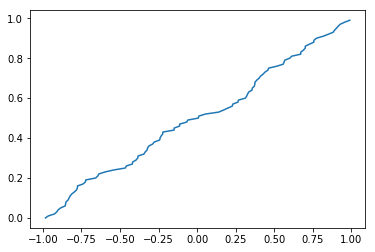

In [215]:
cdf = CDF(X.eval(session=sess))
plt.plot(cdf[0], cdf[1])

In [259]:
h = rbfBandwidth(X)
kernel = lambda xi, xj: rbf(xi, xj, h)

In [260]:
Xnew = tf.identity(X)
for i in range(100):
    h = rbfBandwidth(Xnew)
    kernel = lambda xi, xj: rbf(xi, xj, h)
    Xnew = Xnew + .01*phi_star(X, p, kernel)

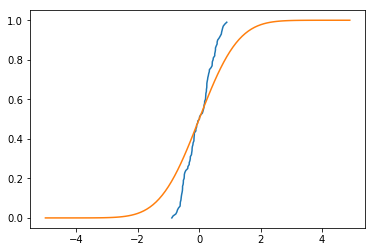

In [261]:
cdf = CDF(Xnew.eval(session=sess))
plt.plot(cdf[0], cdf[1])
plt.plot(np.arange(-5,5,.1), norm.cdf(np.arange(-5,5,.1)))

In [262]:
np.mean(Xnew.eval(session=sess))

-0.0034591318

In [266]:
np.std(Xnew.eval(session=sess))

0.45487237

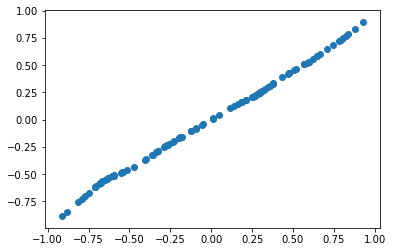

In [264]:
plt.scatter(X.eval(session=sess), Xnew.eval(session=sess))